# Comparison file
_This notebook is made by Katoo_

### Importing libraries

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi
import seaborn as sns

### Merging model metrics for comparison
- Loading csv files
- Extracting relevant metrics from the files
- merging the dataframes
- Renaming the columns
- Saving the combined dataframe

In [107]:
# Load the two CSV files
df_pycaret = pd.read_csv("model_metrics.csv")  # This contains the PyCaret metrics
df_comparison = pd.read_csv("model_metrics_comparison.csv")  # This contains Linear Regression and Decision Tree metrics

# Extract the relevant metrics for PyCaret (R², MAE, MSE)
pycaret_metrics = df_pycaret[df_pycaret['Metric'].isin(["R²", "Mean Absolute Error (MAE)", "Mean Squared Error (MSE)"])]

# Extract the relevant metrics for Linear Regression and Decision Tree from model_metrics_comparison
comparison_metrics = df_comparison[['Metric', 'Linear Regression', 'Decision Tree']]

# Merge the two dataframes on the Metric column to combine them
df_combined = pd.merge(comparison_metrics, pycaret_metrics, on="Metric", how="left")

# Rename the columns to clearly reflect the models
df_combined = df_combined.rename(columns={
    "Linear Regression": "Linear Regression", 
    "Decision Tree": "Decision Tree",
    "Value": "PyCaret"
})

# Save the combined comparison to a new CSV file
df_combined.to_csv("model_comparison.csv", index=False)
print("\nModel comparison saved to 'model_comparison.csv'")



Model comparison saved to 'model_comparison.csv'


### Loading and displaying model comparison data
- Loading csv file
- Displaying the data

In [110]:
# Load the data from the CSV file
df_metrics = pd.read_csv("model_comparison.csv")

# Print the first few rows of the dataframe
print(df_metrics)


                      Metric  Linear Regression  Decision Tree   PyCaret
0                         R²           0.225705       0.610179  0.645026
1  Mean Absolute Error (MAE)           0.470157       0.290239  0.289600
2   Mean Squared Error (MSE)           0.368794       0.185671  0.169422


### Model comparison and analysis
1. Best Overall Model: PyCaret
- R²: PyCaret achieves the highest R² (0.6450), indicating it explains the largest proportion of the variance in the target variable.
- Error Metrics: PyCaret has the lowest MAE (0.2896) and MSE (0.1694), meaning its predictions are closest to the actual values on average.
2. Runner-Up: Decision Tree
- R²: The Decision Tree model (0.6101) is slightly less accurate than PyCaret.
- Error Metrics: It has marginally higher MAE (0.2902) and MSE (0.1857) compared to PyCaret but significantly outperforms Linear Regression.
- The Decision Tree is a good model and performs almost on par with PyCaret, especially for MAE and MSE.
3. Least Accurate Model: Linear Regression
- R²: Linear Regression (0.2257) performs poorly in explaining the variance, suggesting it does not capture the relationship between predictors and the target well.
- Error Metrics: Its MAE (0.4702) and MSE (0.3688) are much higher than the other two models, indicating larger prediction errors.
- Linear Regression underperforms compared to the other models and is less suitable for this dataset.

### Model comparison visualizations
1. Bar chart
    - compare how each model performs across the metrics, making it easy to see which model excels in specific areas
2. Heatmap
    - Identify which model performs best for each metric
3. Line plot
    - Makes it easy to see which model is better or worse for each metric and how they compare overall.

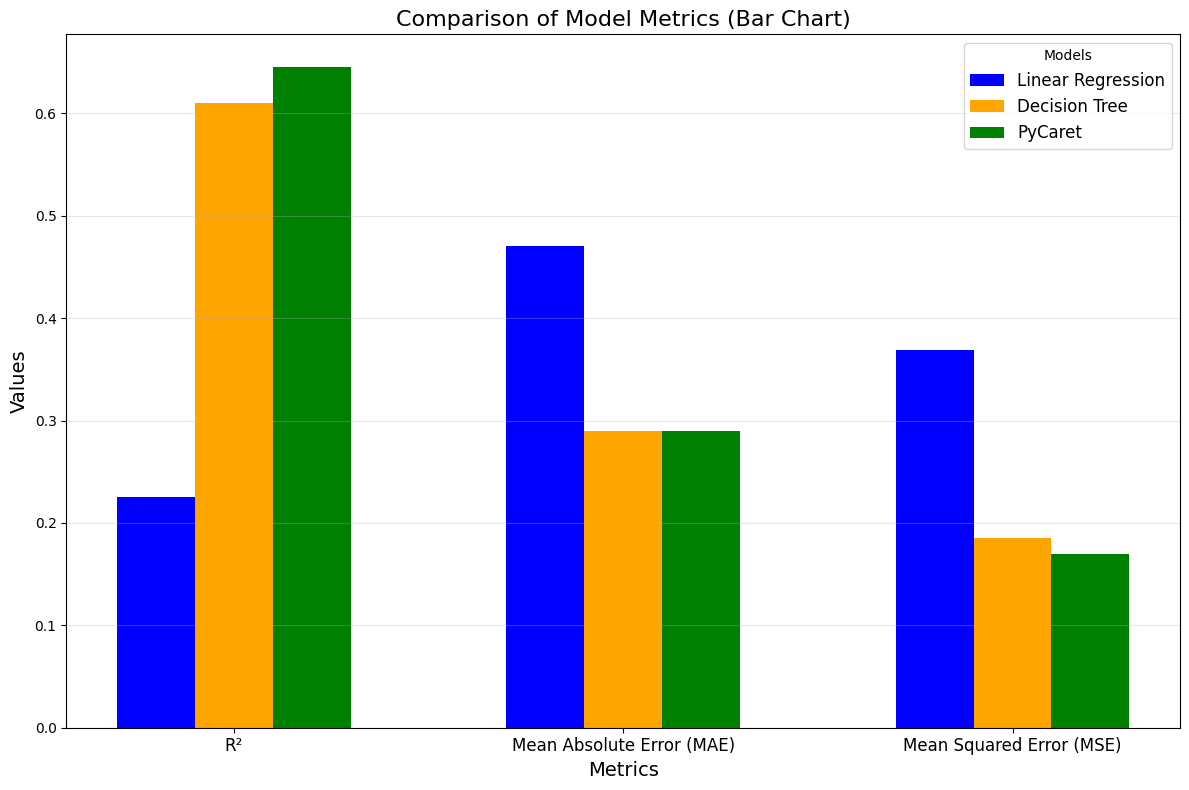

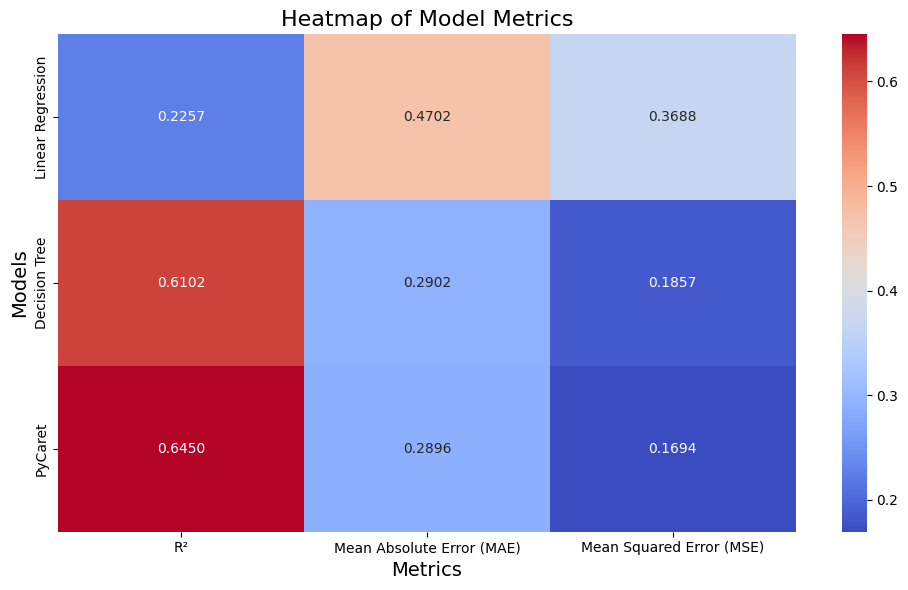

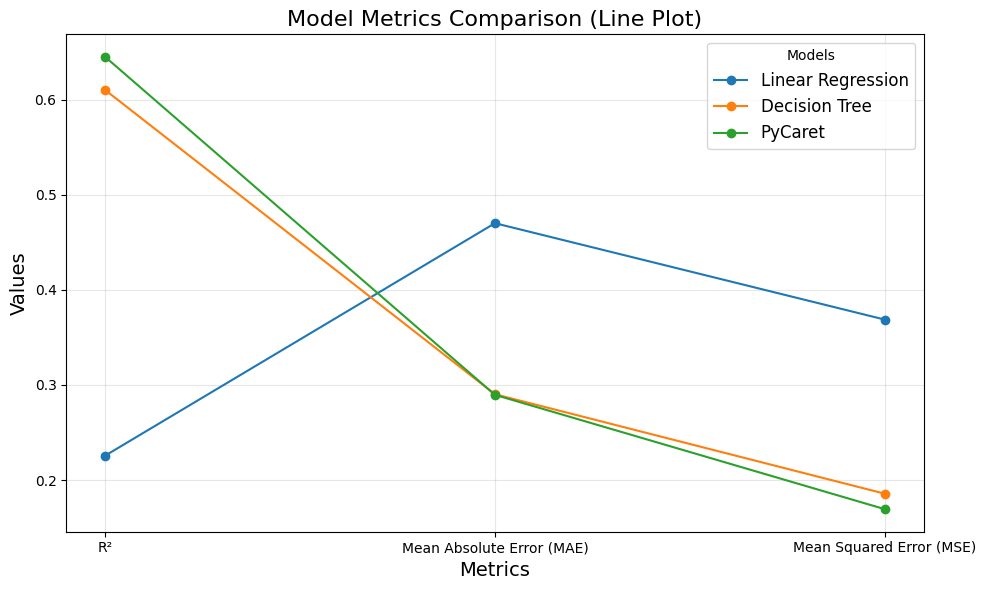

In [109]:
# ----- Bar Chart -----
plt.figure(figsize=(12, 8))
bar_width = 0.2
x = np.arange(len(df_metrics["Metric"]))  # Positions for the bars

# Create bars for each model
plt.bar(x - bar_width, df_metrics["Linear Regression"], width=bar_width, label="Linear Regression", color="blue")
plt.bar(x, df_metrics["Decision Tree"], width=bar_width, label="Decision Tree", color="orange")
plt.bar(x + bar_width, df_metrics["PyCaret"], width=bar_width, label="PyCaret", color="green")

# Add labels, title, and legend
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.title("Comparison of Model Metrics (Bar Chart)", fontsize=16)
plt.xticks(x, df_metrics["Metric"], fontsize=12)
plt.legend(title="Models", fontsize=12)
plt.grid(alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

# ----- Heatmap -----
# Prepare data for heatmap
df_heatmap = df_metrics.set_index("Metric").T  # Transpose so that models are rows and metrics are columns

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Heatmap of Model Metrics", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Models", fontsize=14)
plt.tight_layout()
plt.show()

# ----- Line Plot -----
plt.figure(figsize=(10, 6))
for model in ["Linear Regression", "Decision Tree", "PyCaret"]:
    plt.plot(df_metrics["Metric"], df_metrics[model], marker="o", label=model)

plt.title("Model Metrics Comparison (Line Plot)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(title="Models", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Final Conclusion:
PyCaret is the best model, achieving the highest accuracy (R²) and the lowest errors (MAE and MSE). Decision Tree is a close second and can be a good alternative, while Linear Regression is not recommended due to its poor performance across all metrics.